In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 분류 평가

- 정확도(Accuracy): 가장 직관적으로 이해할 수 있는 지표로, 전체 예측 데이터 중 예측이 정확한 데이터의 비율을 의미합니다. 하지만 이는 불균형한 레이블 클래스를 가진 경우, 즉 특정 클래스의 데이터가 많을 때 모델의 성능을 왜곡할 수 있습니다.

- 오차 행렬(Confusion Matrix): 이진 분류에서 성능을 나타내는 행렬로, FP, FN, TP, TN의 4분면으로 이루어져 있습니다. 각각은 다음과 같습니다.

    - True Positive(TP): 실제 값과 예측 값이 모두 Positive(1)인 경우
    - False Positive(FP): 실제 값은 Negative(0)인데 Positive(1)로 잘못 예측한 경우
    - False Negative(FN): 실제 값은 Positive(1)인데 Negative(0)로 잘못 예측한 경우
    - True Negative(TN): 실제 값과 예측 값이 모두 Negative(0)인 경우
- 정밀도(Precision)와 재현율(Recall):

    - 정밀도: TP / (FP + TP). Positive로 예측한 대상 중에 실제 값이 Positive인 데이터의 비율을 의미합니다.
    - 재현율: TP / (FN + TP). 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive인 데이터 비율을 의미합니다.
    - F1 스코어: 정밀도와 재현율을 결합한 지표로, 이 두 값이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가집니다.

    - ROC-AUC: Receiver Operation Characteristic Curve와 이 곡선의 면적인 Area Under Curve를 의미합니다. 이진 분류의 예측 성능 측정에서 중요하게 사용되며, 1에 가까울수록 좋은 수치를 나타냅니다.

- 위의 지표들은 sklearn.metrics 모듈에서 제공하는 다양한 API를 통해 쉽게 계산할 수 있습니다. 이 지표들을 통해 모델의 성능을 평가하고, 모델 간 성능을 비교하거나, 하이퍼파라미터 튜닝 등을 통해 모델을 개선할 수 있습니다.

* TP, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생

In [64]:
titanic_df = pd.read_csv('./dataset/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
#타이타닉 데이터셋을 사용하여 로지스틱 회귀(Logistic Regression) 모델을 학습하고, 정확도를 평가하는 목적. 
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr 
# len(X_test)

0.8491620111731844

y_titanic_df = titanic_df['Survived']: 데이터프레임에서 'Survived' 열을 추출하여 종속 변수(레이블)로 지정합니다. 이는 예측할 대상인 생존 여부를 나타냅니다.

X_titanic_df = titanic_df.drop('Survived', axis=1): 데이터프레임에서 'Survived' 열을 제외한 나머지 열을 독립 변수(피처)로 지정합니다.

X_titanic_df = transform_features(X_titanic_df): 'X_titanic_df' 데이터프레임에 대해 전처리를 수행하는 transform_features 함수를 호출하여 데이터를 변환합니다. 전처리는 데이터의 결측치 처리, 범주형 변수 인코딩 등을 포함할 수 있습니다.

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11): 변환된 피처(X_titanic_df)와 레이블(y_titanic_df) 데이터를 학습용(train)과 테스트용(test) 데이터로 분리합니다. 이때, 전체 데이터 중 20%를 테스트 데이터로 설정하고, random_state=11을 통해 분리 과정에서 동일한 결과를 얻을 수 있도록 난수 초기값을 설정합니다.

lr_clf = LogisticRegression(): 로지스틱 회귀 분류기 모델(lr_clf)을 생성합니다.

lr_clf.fit(X_train, y_train): 로지스틱 회귀 모델을 학습용 데이터에 맞추어 학습시킵니다.

pred = lr_clf.predict(X_test): 학습된 모델을 사용하여 테스트 데이터에 대한 예측을 수행합니다.

accuracy_lr = accuracy_score(y_test, pred): 테스트 데이터에 대한 예측 결과(pred)와 실제 레이블(y_test)을 비교하여 정확도를 계산합니다. 이를 accuracy_lr 변수에 저장합니다.

accuracy_lr: 계산된 정확도를 출력합니다.

과제1_0517.전처리 사용자 함수 transform_features(df)을 수정 보완하여 적용하고 알고리즘을 dt를 사용하여 모델링 및 성능평가를 수행하세요.

In [5]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(type(pred_proba[:3]))
type(pred.reshape(-1,1))
pred.reshape(-1,1)[:3]
pred_proba[:3]
# pred_proba_resutl = np.concatenate([pred_proba,pred.reshape(-1,1)])

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
type(pred_proba[:3])
print(pred.reshape(-1,1)[:3])
pred_proba[:3]

<class 'numpy.ndarray'>
[[1]
 [0]
 [0]]


array([[0.46167981, 0.53832019],
       [0.87859948, 0.12140052],
       [0.87725166, 0.12274834]])

In [6]:
# 타이타닉 생존 데이터를 학습한 LogisticRegression 객체에서 predict_proba() 메서드 수행
# 수행한 뒤 반환 값을 확인하고 predict() 메서드와 비교
# predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API 

pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
print('pred에서 앞 3개만 샘플로 추출 \n:', pred[:3])
print('pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 \n:',pred.reshape(-1,1)[:3])
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])
type(pred_proba_result)

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46167981 0.53832019]
 [0.87859948 0.12140052]
 [0.87725166 0.12274834]]
pred에서 앞 3개만 샘플로 추출 
: [1 0 0]
pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 
: [[1]
 [0]
 [0]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46167981 0.53832019 1.        ]
 [0.87859948 0.12140052 0.        ]
 [0.87725166 0.12274834 0.        ]]


numpy.ndarray

In [7]:
# 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정
# threshold 변수를 특정 값으로 설정하고 사이킷런의 Binarizer 클래스를 객체로 생성
# fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray 의 값이 
# threshold보다 같거나 작으면 0, 크면 1값 반환

from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


과제2_0517. 랜덤하게 2차원 배열을 생성한 후 임계값을 0.5로 지정한 후 임계값 보다 크면 1 작으면 0으로 변환하세요.

In [8]:
# 생존 확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측
from sklearn.preprocessing import Binarizer
custom_threshold = 0.1
print('pred_proba: \n', pred_proba[0:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률: \n',pred_proba_1[0:5])
print()
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

pred_proba: 
 [[0.46167981 0.53832019]
 [0.87859948 0.12140052]
 [0.87725166 0.12274834]
 [0.88283056 0.11716944]
 [0.85512139 0.14487861]]

생존확률: 
 [[0.53832019]
 [0.12140052]
 [0.12274834]
 [0.11716944]
 [0.14487861]]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1 score: {3:.4f}'.format(accuracy , precision ,recall, f1))
    
get_clf_eval(y_test , custom_predict)

오차 행렬
[[ 18 100]
 [  0  61]]
정확도: 0.4413, 정밀도: 0.3789, 재현율: 1.0000, f1 score: 0.5495


In [10]:
# F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)

In [11]:
F1 = 2 * (0.3789 * 1.0000 ) / (0.3789 + 1.0000)
F1

0.5495684966277468

In [12]:
# 분류 결정 임계값은 positive 예측값을 결정하는 확률의 기준
# 임계값을 낮출수록 True값이 많아지게 되며, Positive 예측값이 많아지면 FN은 하락해서 재현율은 올라감
# Binarizer 의 임계값 설정값을 0.4로 설정, 즉 분류 결정 임계값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1 score: 0.7786


위 코드는 분류 모델의 예측 확률(pred_proba)을 이진화하는 과정을 나타냅니다.

custom_threshold = 0.4: custom_threshold 변수에 임계값을 0.4로 설정합니다. 이 임계값은 예측 확률을 기준으로 양성 클래스와 음성 클래스를 구분하는 기준이 됩니다.

pred_proba_1 = pred_proba[:,1].reshape(-1,1): pred_proba 배열에서 두 번째 열(인덱스 1)을 선택하고, 해당 열을 열 벡터 형태로 재구성합니다. 이렇게 선택된 열은 클래스 1에 속할 확률을 나타냅니다. pred_proba_1은 이 확률 값을 담은 열 벡터가 됩니다.

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1): Binarizer 클래스를 사용하여 이진화 작업을 수행합니다. threshold 매개변수에는 앞서 설정한 custom_threshold 값을 전달하여 임계값을 설정합니다. fit 메서드를 호출하여 Binarizer 객체를 훈련시킵니다. 이는 임계값을 기반으로 이진화 작업을 수행하기 위한 준비 과정입니다.

Binarizer는 예측 확률을 임계값에 따라 0과 1로 변환하는 변환기입니다. 임계값을 기준으로 확률이 임계값 이상인 경우 1로, 이하인 경우 0으로 변환합니다. fit 메서드를 호출하여 변환기를 훈련시키는 이유는 임계값을 사용하여 변환 작업을 수행하기 위해서입니다. 훈련된 변환기(binarizer)는 이후에 예측 확률을 이진화하는 데 사용될 수 있습니다.

In [13]:
# 테스트를 수행할 모든 임겟값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        
        get_clf_eval(y_test, custom_predict)
        print()
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1 score: 0.7786

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, f1 score: 0.7840

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1 score: 0.7805

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, f1 score: 0.7931

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, f1 score: 0.8036



In [21]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precision, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
type(thresholds)
print(thresholds.shape)
pd.Series(thresholds).value_counts
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
np.round(thresholds[thr_index],2)

(143,)
[  0  15  30  45  60  75  90 105 120 135]


array([0.1 , 0.12, 0.14, 0.19, 0.28, 0.4 , 0.57, 0.67, 0.82, 0.95])

In [14]:
from sklearn.metrics import precision_recall_curve 
# precision_recall_curve
# 분류 모델의 정밀도-재현율 곡선(precision-recall curve)을 생성하는 함수입니다. 
# 이 곡선은 임계값(threshold)의 변화에 따른 정밀도와 재현율의 변화를 나타냅니다.
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#lr_clf.predict_proba(X_test)는 테스트 데이터인 X_test에 대한 예측 확률을 반환하는 메서드입니다. 
# 이때, predict_proba 메서드는 각 클래스에 속할 확률을 반환합니다.

# [:, 1]은 NumPy 배열의 슬라이싱 구문입니다. 이를 통해 예측 확률 배열에서 두 번째 열에 해당하는 값만 선택합니다. 
# 이는 이진 분류에서 양성 클래스에 속할 확률을 의미합니다.

# 따라서, pred_proba_class1은 로지스틱 회귀 모델(lr_clf)에 의해 테스트 데이터 X_test에 대해 예측된 
# 양성 클래스(클래스 1)에 속할 확률을 담고 있는 배열입니다. 
# 각 요소는 0부터 1까지의 값으로, 해당 샘플이 양성 클래스에 속할 확률을 나타냅니다.

precision, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
# 정밀도, 재현율 및 해당 임계값을 계산하는 함수입니다. 
# 이를 통해 양성 클래스에 대한 정밀도, 재현율 및 임계값의 배열을 얻을 수 있습니다.
type(thresholds)


numpy.ndarray

In [18]:
print(thresholds.shape)

(143,)


In [32]:
pd.Series(thresholds).value_counts

<bound method IndexOpsMixin.value_counts of 0      0.101578
1      0.101581
2      0.101615
3      0.106591
4      0.107561
         ...   
138    0.945315
139    0.958905
140    0.961802
141    0.966335
142    0.968763
Length: 143, dtype: float64>

In [34]:
# 15 간격으로 뽑아서
thr_index = np.arange(0,thresholds.shape[0],15)
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [35]:
# 뽑은 것들 임계값 보여줘
np.round(thresholds[thr_index],2)

array([0.1 , 0.12, 0.13, 0.19, 0.28, 0.4 , 0.61, 0.68, 0.83, 0.94])

In [22]:
# 임곗값, 정밀도, 재현율 비교
# 임곗값을 15 step으로 추출
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class1[0:10])
print()

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('정밀도:',precisions[0:5])
print('재현율:',recalls[0:5])
print('임곗값:',thresholds[0:5])
print('\n')
print(pd.Series(thresholds).value_counts)
print('\n')
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print()
print(np.round(thresholds[thr_index],2))
# len(pred_proba_class1)

[0.53832019 0.12140052 0.12274834 0.11716944 0.14487861 0.11770315
 0.11163578 0.79081919 0.21741284 0.63008481]

반환된 분류 결정 임곗값 배열의 Shape: (143,)
정밀도: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현율: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
임곗값: [0.10395662 0.10395882 0.10398355 0.10734156 0.10894069]


<bound method IndexOpsMixin.value_counts of 0      0.103957
1      0.103959
2      0.103984
3      0.107342
4      0.108941
         ...   
138    0.948919
139    0.949186
140    0.950736
141    0.951989
142    0.965180
Length: 143, dtype: float64>


[  0  15  30  45  60  75  90 105 120 135]

[0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]


In [39]:

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
print(pred_proba_class1[0:10])

precision, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)

[0.53466466 0.11915311 0.12117653 0.10854157 0.13724495 0.10871817
 0.1092846  0.79527269 0.20637618 0.61169228]


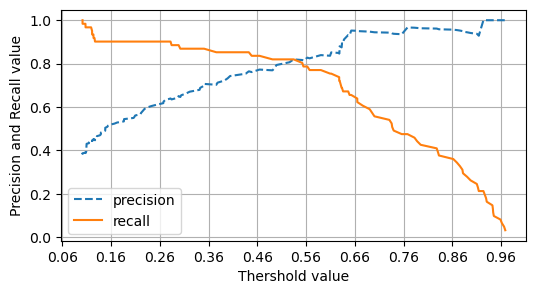

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(6,3))
    threshold_boundary = thresholds.shape[0]
    
    plt.plot(thresholds,precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Thershold value'); plt.ylabel('Precision and Recall value')
    plt.legend() ; plt.grid()
    
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

#### 결과 해석
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
- 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

#### 정밀도 및 재현율 활용시 유의 사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측 전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측 FP는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0) = 1
- 재현율이 100%가 되는 방법: 모든 환자를 Positive로 예측 1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN)은 30/(30+0) = 1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

In [24]:
# F1 스코어는 정밀도와 재현율을 결합한 지표
# F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [25]:
# 임계값을 변화시키면서 F1 스코어를 포함한평가 지표 산출
# get_eval_by_threshold() 선실행
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    print()
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# F1 스코어는 임곗값이  0.6일때 가장 좋은 값을 보여주지만 재현율이 크게 감소하는 점 유의

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786


임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840


임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805


임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931


임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036




#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨. 
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

ROC 곡선(Receiver Operating Characteristic curve), AUC
- 분류 모델의 성능을 시각화하는 데 사용되는 그래프입니다.
- 이 그래프는 분류 모델의 임계값(threshold)을 변화시키면서, True Positive Rate(TPR)에 대한 FPR의 변화를 나타냅니다.
- FPR은 "False Positive Rate"의 약자로, 거짓 양성 비율을 나타내는 지표입니다. 
    - TPR = TP / (TP + FN)
    - FPR = FP / (FP + TN) = 1 - 특이도(TN/(FP + TN))
- FPR은 0부터 1까지의 값을 가지며, 분류 모델의 임계값에 따라 변화합니다. 
- 임계값이 낮을수록 모델은 더 많은 샘플을 양성으로 분류하며, 이로 인해 FPR은 증가합니다. 
- 임계값이 높을수록 모델은 더 많은 샘플을 음성으로 분류하며, FPR은 감소합니다.
- ROC 곡선은 FPR을 x축에, TPR(민감도, True Positive Rate)를 y축에 나타냅니다. 따라서 ROC 곡선은 임계값 변화에 따른 모델의 TPR과 FPR의 관계를 보여줍니다. 
- 좋은 분류 모델은 FPR이 낮은 상태에서 높은 TPR을 유지하는 곡선이 되어야 합니다. 
- ROC 곡선의 아래쪽 면적인 AUC(Area Under the Curve)는 분류 모델의 성능을 종합적으로 평가하는 지표로 사용됩니다. 
- AUC가 1에 가까울수록 모델의 성능이 우수하다고 판단할 수 있습니다.

In [ ]:
# 타이타닉 데이터셋으로 모델링한 후 ROC AUC를 포함한 모든 분류 평가지표를 사용하여 평가를 수행하시고
# ROC AUC를 시각화 하세요.

In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score
import pandas as pd
tdf = pd.read_csv('./dataset/train.csv')
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
titanic_df = pd.read_csv('./dataset/train.csv')

def get_cate(df):
    cat = ''
    if df['Fare'] <= 8: 
        cat = '1'
    elif df['Fare'] <= 31: 
        cat = '2'
    elif df['Fare'] <= 200: 
        cat = '3'
    else: 
        cat = '4'
    return cat

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df['Fare'] = df.apply(get_cate, axis=1)
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [12]:
from sklearn.metrics import roc_curve
from sklearn. linear_model import LogisticRegression
import numpy as np

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train ,y_train)           
pred = lr_clf.predict(X_test)


pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
frps, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
thr_index = np.arange(1,thresholds.shape[0],5)

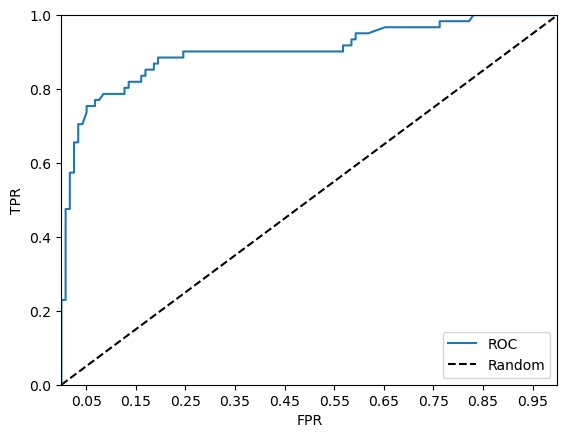

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def roc_curve_plot(y_test, pred_proba_c1):
    frps, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    
    plt.plot(frps,tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1);
    plt.xlabel('FPR');plt.ylabel('TPR')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [16]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값: {0:.4f}'.format(roc_score))

ROC AUC값: 0.9026


In [25]:
def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score (y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    #print('오차 행렬', confusion)
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1 score: {3:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, pred, pred_proba)

[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, f1 score: 0.7869
